In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

##### Included all the necessary libraries for Data Analysis

In [49]:
df = pd.read_csv(r'ArjunP_24202600_DiwaliSales Data.csv',encoding = 'unicode_escape')

##### Reading the dataset using read.csv function

# 1.DATA Review

In [50]:
df.head(5)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002765,Natalie,P00125545,F,26-35,27,0,Delhi,Central,Retail,Auto,3,25320.0,NaN,NaN
1,1002843,Andra,P00125999,F,26-35,27,0,Maharashtra,Western,Media,Auto,4,25600.0,NaN,NaN
2,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
3,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
4,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN


##### Head function shows the first 5 rows of the dataset which gives a helpful insight into our dataset

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11253 entries, 0 to 11252
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11253 non-null  int64  
 1   Cust_name         11253 non-null  object 
 2   Product_ID        11253 non-null  object 
 3   Gender            11253 non-null  object 
 4   Age Group         11253 non-null  object 
 5   Age               11253 non-null  int64  
 6   Marital_Status    11253 non-null  int64  
 7   State             11253 non-null  object 
 8   Zone              11253 non-null  object 
 9   Occupation        11253 non-null  object 
 10  Product_Category  11253 non-null  object 
 11  Orders            11253 non-null  int64  
 12  Amount            11241 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


##### The info func Shows the Column names and basic information about the column data. for example, how many null values present in the column, data type of column etc

In [52]:
print("Basic statistics:")
print(df.describe())

Basic statistics:
            User_ID           Age  Marital_Status        Orders        Amount  \
count  1.125300e+04  11253.000000    11253.000000  11253.000000  11241.000000   
mean   1.003004e+06     35.419710        0.420243      2.489469   9456.458716   
std    1.715975e+03     12.753483        0.493620      1.115049   5226.254045   
min    1.000001e+06     12.000000        0.000000      1.000000    188.000000   
25%    1.001492e+06     27.000000        0.000000      2.000000   5443.000000   
50%    1.003065e+06     33.000000        0.000000      2.000000   8109.000000   
75%    1.004430e+06     43.000000        1.000000      3.000000  12678.000000   
max    1.006040e+06     92.000000        1.000000      4.000000  25600.000000   

       Status  unnamed1  
count     0.0       0.0  
mean      NaN       NaN  
std       NaN       NaN  
min       NaN       NaN  
25%       NaN       NaN  
50%       NaN       NaN  
75%       NaN       NaN  
max       NaN       NaN  


##### describe function give basic statical information about the data for example std, mean, min, max etc. This gives a basic understanding of the dataset.

## 2.Data Cleaning

### 2.1 Handling Missing data

In [53]:
# Deleting the columns with null values

In [54]:
df.drop(['Status','unnamed1'], axis = 1, inplace = True)

##### drop function is used to remove the select columns from our dataset as they don't have any values or if it's not usefull. In our scenario, the `Status` and `unnamed1` columns are completely empty so these 2 columns are dropped from out dataset

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11253 entries, 0 to 11252
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11253 non-null  int64  
 1   Cust_name         11253 non-null  object 
 2   Product_ID        11253 non-null  object 
 3   Gender            11253 non-null  object 
 4   Age Group         11253 non-null  object 
 5   Age               11253 non-null  int64  
 6   Marital_Status    11253 non-null  int64  
 7   State             11253 non-null  object 
 8   Zone              11253 non-null  object 
 9   Occupation        11253 non-null  object 
 10  Product_Category  11253 non-null  object 
 11  Orders            11253 non-null  int64  
 12  Amount            11241 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


##### Checking the dataset after deleting the columns 'Status','unnamed1'

In [56]:
# Check the Null values or NAN Values in a column

In [57]:
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

##### Checking if the columns contains any null or nan values using `isnull` function and summing them up to check the count using sum function. `Amout` column has 12 null values

In [58]:
#Taking the mean value of the Amount column and filling the the NAN columns with that mean value

In [59]:
df['Amount'] = df['Amount'].fillna(round(df['Amount'].mean(),2))

##### since 'Amount' column has 12 null values, filling up those values using mean value of the whole Amount column and filling it using fillna function 

In [60]:
pd.isnull(df).sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

##### recheking if there is any column with null values 

### 2.2 Handle Duplicates

In [61]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
11248    False
11249    False
11250    False
11251    False
11252    False
Length: 11253, dtype: bool

##### checked if there are any duplicate records in the dataset using duplicated function. In our dataset there are no duplicate records 

### 2.3 Correct Data Types

In [62]:
df['Amount'] = df['Amount'].astype(int)

##### Changing the datatype of Amount from float to int to ensure consistency in the dataset.

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11253 entries, 0 to 11252
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   User_ID           11253 non-null  int64 
 1   Cust_name         11253 non-null  object
 2   Product_ID        11253 non-null  object
 3   Gender            11253 non-null  object
 4   Age Group         11253 non-null  object
 5   Age               11253 non-null  int64 
 6   Marital_Status    11253 non-null  int64 
 7   State             11253 non-null  object
 8   Zone              11253 non-null  object
 9   Occupation        11253 non-null  object
 10  Product_Category  11253 non-null  object
 11  Orders            11253 non-null  int64 
 12  Amount            11253 non-null  int64 
dtypes: int64(5), object(8)
memory usage: 1.1+ MB


##### Rechecking the data type of 'Amount' column

### 2.4 handling outliers

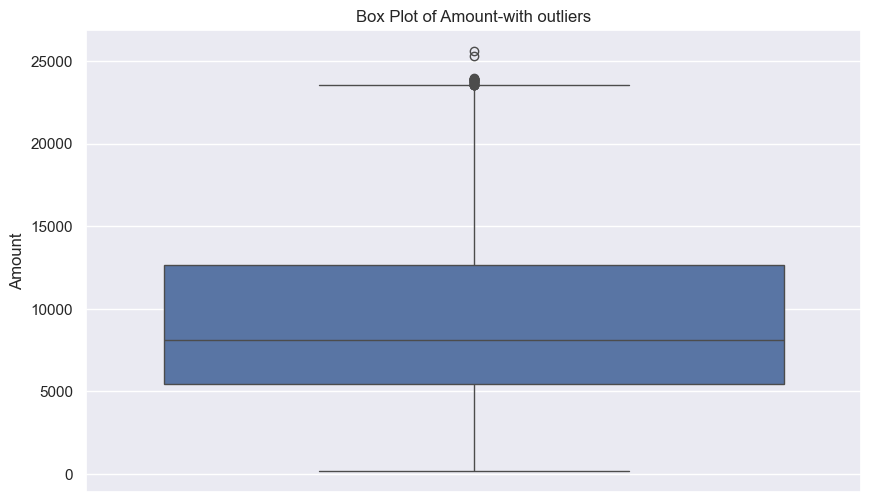

In [64]:
plt.figure(figsize=(10, 6))
sns.boxplot(df['Amount'])
plt.title('Box Plot of Amount-with outliers')
plt.show()

##### The dataset has a broad distribution. Small circles beyond the upper whisker represent outliers, indicating that some transaction amounts exceed typical values (above approximately 24,000).

In [70]:
#Removal of Outliers
Q1 = df['Amount'].quantile(0.25)
Q3 = df['Amount'].quantile(0.75)
IQR = Q3 - Q1

#Setting lower and upper bound
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

#Removing Outliers
df = df[(df['Amount']>=lower_bound) & (df['Amount']<=upper_bound)]

##### Removing the outliers by setting the threshold values by using quantile function and any value above the thresold value is removed from the dataset

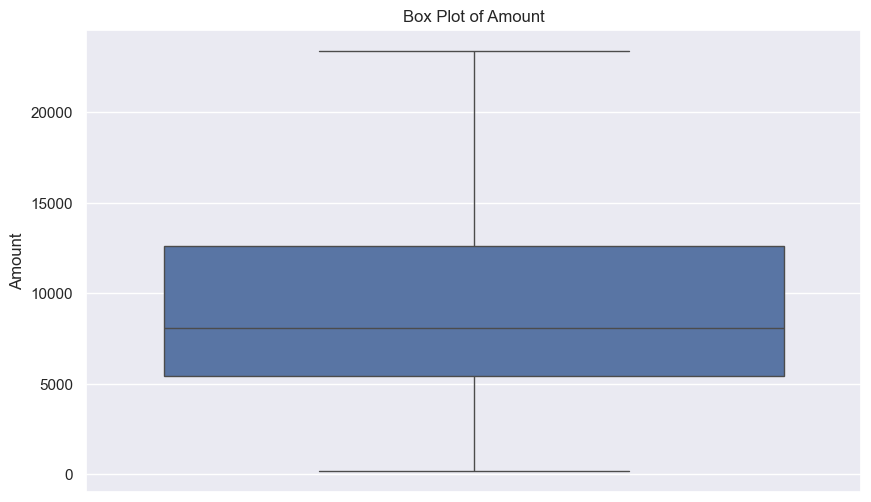

In [71]:
plt.figure(figsize=(10, 6))
sns.boxplot(df['Amount'])
plt.title('Box Plot of Amount')
plt.show()

##### Box plot after removal of the outliers

## 3.EXPLORATORY DATA ANALYSIS

### 3.1 Descriptive statistics

In [72]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.122500e+04,11225.000000,11225.000000,11225.000000,11225.000000
mean,1.003006e+06,35.423073,0.420045,2.489710,9420.656303
std,1.715798e+03,12.749218,0.493588,1.115124,5180.433470
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001495e+06,27.000000,0.000000,2.000000,5442.000000
50%,1.003067e+06,33.000000,0.000000,2.000000,8107.000000
75%,1.004430e+06,43.000000,1.000000,3.000000,12622.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23389.000000


##### Gives basic Statistical information of the numerical datatypes in our dataset. for example, mean value `Amount` column is 9420.5

### 3.2Correlation Analysis

In [73]:
correlation = df['Amount'].corr(df['Orders'])
print(correlation)

-0.012261456297672453


##### Interpretation:
##### Since the value is very close to zero (-0.012), the two columns 'Amount' and 'Orders' can be considered practically independent or uncorrelated in linear terms.
##### This means changes in 'Amount' likely do not linearly predict changes in 'Orders'.

### 3.3 Data Visaulization

#### Top 10 orders state vise

Text(0.5, 0.98, 'Orders by State')

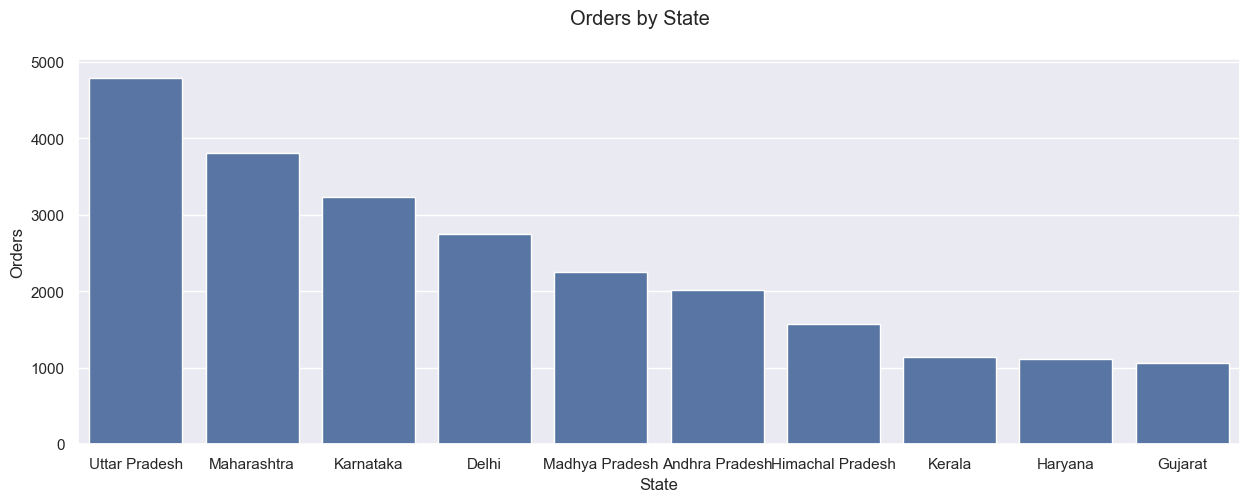

In [74]:
#Top 10 orders state vise

sales_state = df.groupby(['State'], as_index = False)['Orders'].sum().sort_values(by = 'Orders', ascending =False).head(10)

sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data = sales_state,x = 'State',y = 'Orders')
plt.suptitle ('Orders by State')

##### The above graph shows that Uttrakhad state has the highest number of Orders at around 4.5k followed by Maharashtra and Karnataka at 3.7k and 3.3k respectively. Whereas kerala, Haryana and Gujrat are the least with orders of 1.5k approximately. 

#### Top 10 Amount spent state vise

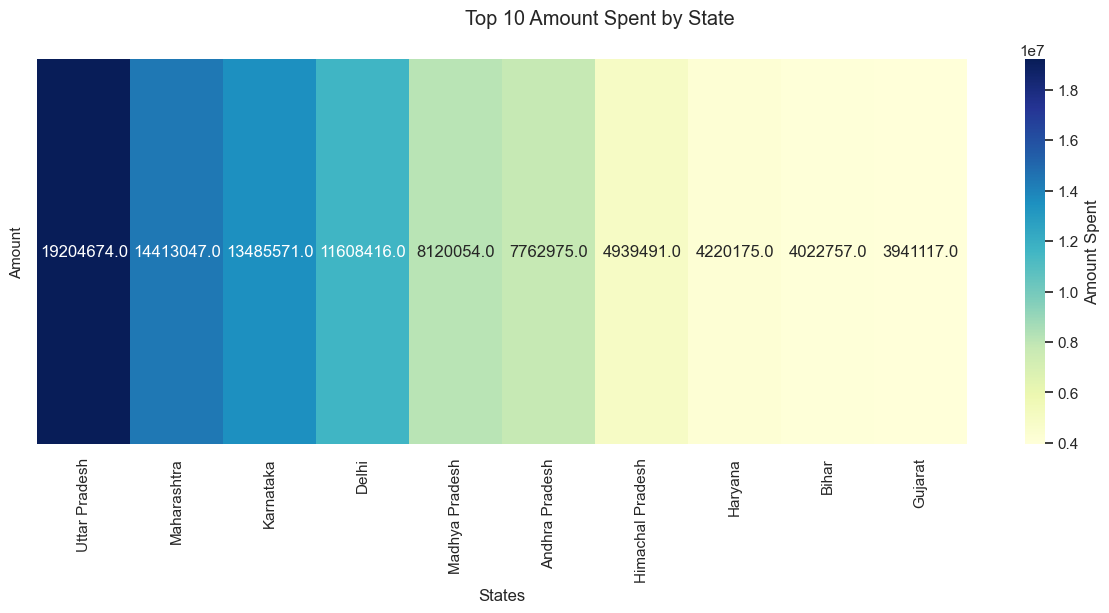

In [75]:
#Top 10 Amount spent state vise

sales_state = df.groupby(['State'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending =False).head(10)
#Create a heatmap-friendly format by pivoting the data
heatmap_data = sales_state.set_index('State').T

sns.set(rc={'figure.figsize':(15,5)})
#sns.(data = sales_state,x = 'State',y = 'Amount')

sns.heatmap(heatmap_data, annot=True, cmap="YlGnBu", cbar_kws={'label': 'Amount Spent'},fmt=".1f")
plt.suptitle('Top 10 Amount Spent by State')
plt.xlabel('States')
plt.show()

##### The above visualization demonstrates the highest amount spent by states. Uttrakhand comes out to be leading the chart with 1.9cr spent in Diwali followed by Maharathra and Karnataka with Amount of 1.4cr and 1.3cr respectively. Gujrat has spent the least Amount at 39L.

#### top 10 sales by product ID

Text(0.5, 0.98, 'Sales by Product ID')

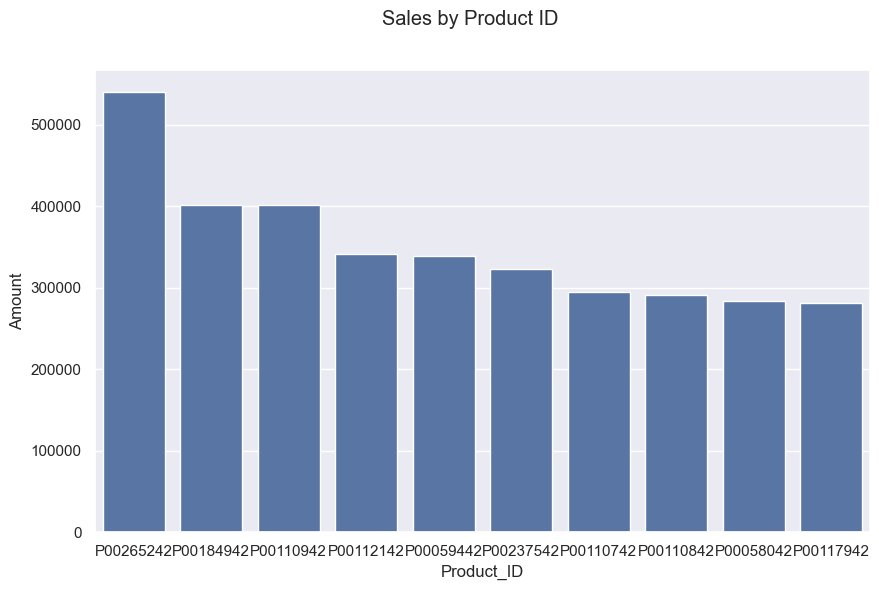

In [76]:
#top 10 sales by product ID
plt.figure(figsize=(10, 6))
Sales_Product = df.groupby(['Product_ID'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending =False).head(10)


sns.barplot(data = Sales_Product,x = 'Product_ID',y = 'Amount')
plt.suptitle ('Sales by Product ID')

##### The plot above demonstrates the Amount spent on each Product ID. Product Id 'P0026524' has resulted in the highest expenditure of value around 5.5L. where as product Ids like 'P00110842','P00058042' and 'p00117942' has the least amount of almost 3L. This data can be helpful by targeting the Products with most Amount and can be helpful in increasing sales in future.

#### Pairplot of Amount, Orders, and Age by Product Category

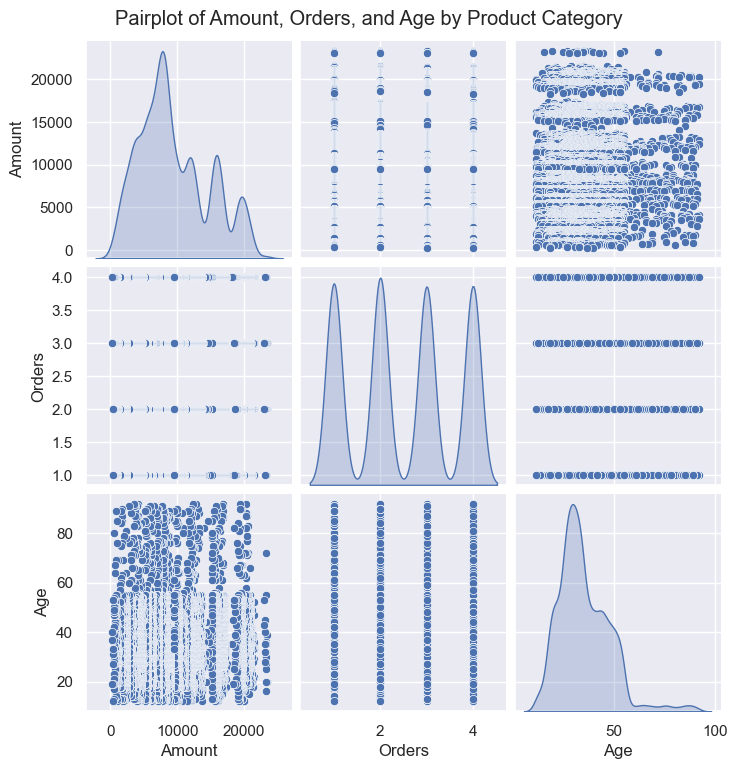

In [77]:

numeric_columns = ['Amount', 'Orders', 'Age']

# pairplot
sns.pairplot(df[numeric_columns],diag_kind='kde',markers='o')

plt.suptitle('Pairplot of Amount, Orders, and Age by Product Category', y=1.02)
plt.show()

##### The figure below is a pairplot of the distribution and relationships among three numerical variables: Amount, Orders, and Age. Diagonal plots show the distribution of each variable. scatter plots illustrate pairwise variable relationships with potential correlations. Amount illustrates right-skewed distribution with many small transactions, Orders have discrete values concentrated between 1 and 4, and Age distribution reveals most customers between approximately 20 to 60 years of age.

#### Buyers Married vs unmarried

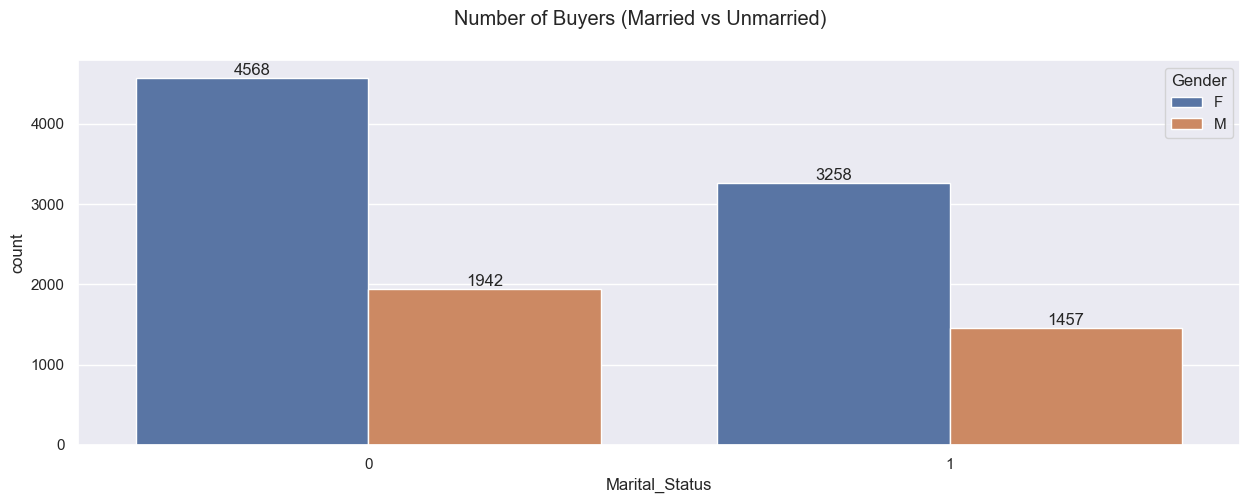

In [78]:
ax = sns.countplot(data = df, x="Marital_Status", hue="Gender")
plt.suptitle("Number of Buyers (Married vs Unmarried)")

for bars in ax.containers:
    ax.bar_label(bars)

##### The above graph shows the number of buyers based on the Mariral Status. 0 represents unmarried and 1 represents married. As per the graph above, unmarried Females has spent the highest amount where as married men has the lowest

#### Number of sales by Occupation

Text(0.5, 0.98, 'Sales by Occupation')

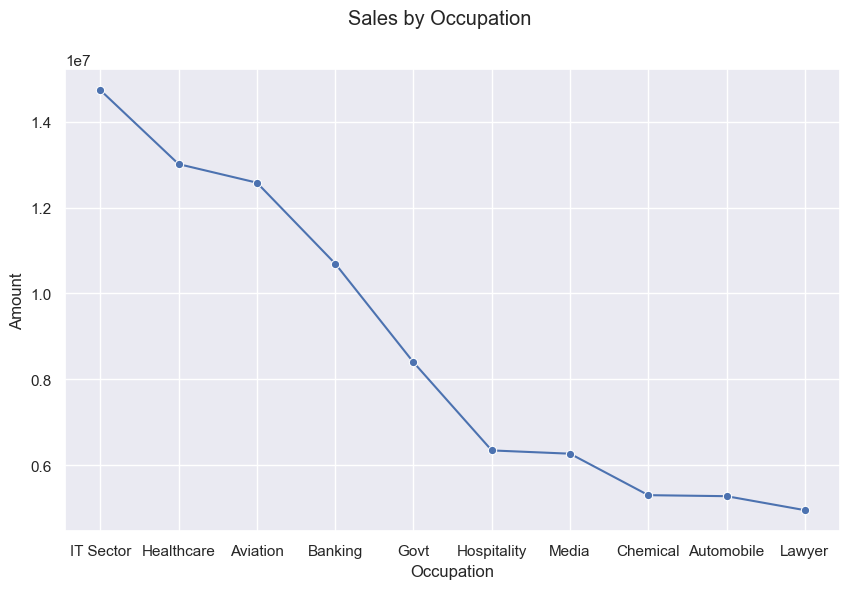

In [79]:
#Number of sales by Occupation
 
plt.figure(figsize=(10, 6))
Sales_occupation = df.groupby(['Occupation'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending =False).head(10)


sns.lineplot(data = Sales_occupation,x = 'Occupation',y = 'Amount',marker='o')
plt.suptitle ('Sales by Occupation')

##### The above graph describes the Amount spent by each sector. As per the graph, IT Sector has spent the highest amount followed by Healthcare and Aviation. The Occupation of chemical, Automobile and Law has spent the least amount

#### Male vs Female buyers

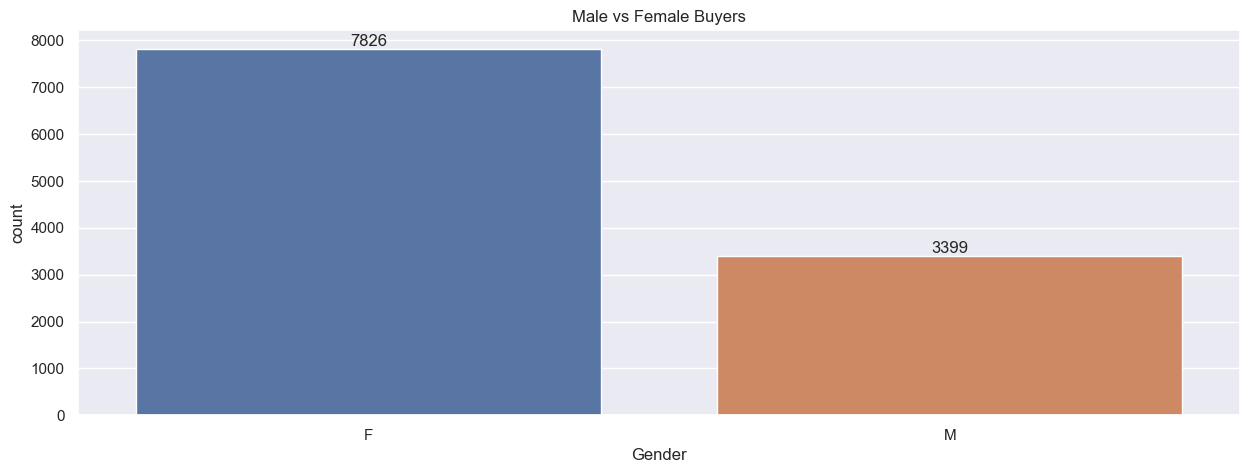

In [80]:
ax = sns.countplot(x=df['Gender'],data=df,hue='Gender')
plt.title('Male vs Female Buyers')
for bars in ax.containers: 
    ax.bar_label(bars)

##### The Above graph shows the number of buyers based on Gender with Females have spent most amount as compared to male. 

#### Amount Spent by Product Category

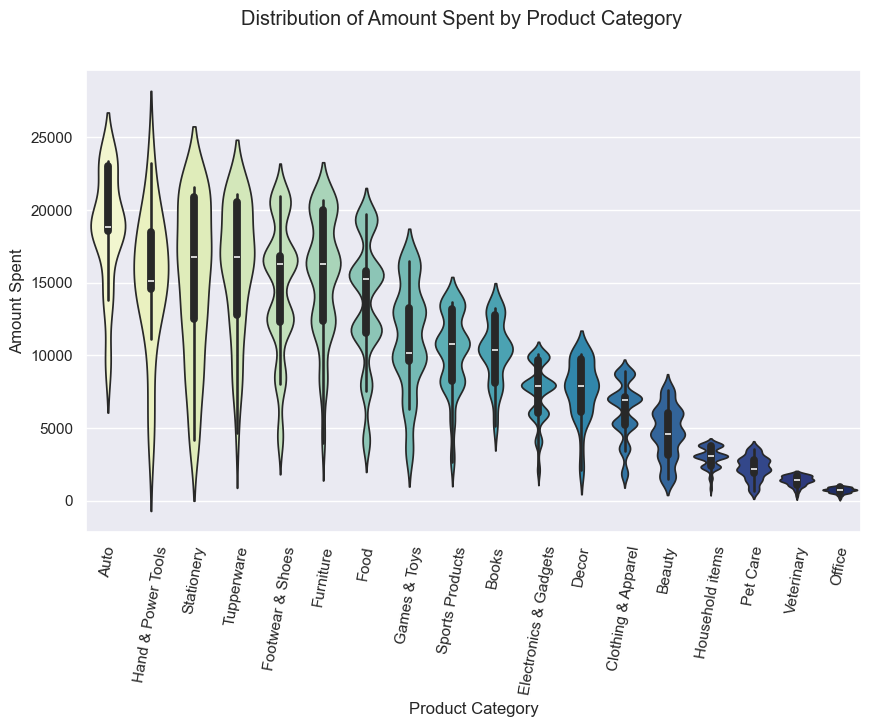

In [81]:
# Create a violin plot to show the distribution of Amount by Product Category
plt.figure(figsize=(10, 6))
sns.violinplot(x='Product_Category', y='Amount', data=df, hue = 'Product_Category', palette='YlGnBu',legend = False)

# Customization
plt.suptitle('Distribution of Amount Spent by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Amount Spent')
plt.xticks(rotation=80)

# Show the plot
plt.show()

##### The plot above is a violin plot of the distribution of "Amount Spent" for different product categories. Categories like Auto, Hard & Power Tools, and Stationery all have greater spending and broader distributions, whereas categories like Veterinary and Office have significantly lower spending distributions and narrower violin shapes, indicating less variability and overall lower amounts spent.

# Conclusion

The analysis of the Diwali sales dataset gives some significant insights into regional sales performance as well as customer behavior. The 11,231-row, 15-column dataset contains a mix of features like product categories, demographics of customers, and expenditure. The basic statistics reveal a broad range of expenditure, an average of 9,420.16, but a massive standard deviation of 5,180.22, which means high variability in the expenditure of customers. Minimum and maximum values also show that even though most of the customers make low values, there are few who spend extremely high values.

The age group of the customers, with an average age of 35, ranges from 12 to 92 years, reflecting a prosperous clientele mix. Single customers dominate, and married customers represent a smaller group. The breakdown of orders by state (region) highlighted that certain states contribute much greater total sales than others. This observation will reflect the potential of targeted marketing campaigns in high-performing states for maximum revenue.

Outliers in the data set, particularly the `Amount` column, were addressed by processing through Interquartile Range (IQR) to avoid anomalies distorting the study as a whole. Visualizations such as the state-product category heat map of total amounts spent on products and regions showed what areas of the country contributed most towards revenue and how products performed overall in each of the states. The Empirical Cumulative Distribution Function (ECDF) graph of the top 10 states revealed that sales in certain states came at a faster rate, which may imply more interest and purchase frequency among customers.

The pairplot of `Amount`, `Orders`, and `Age` provided further insights into relationships between variables, without however finding any significant skewing by any single factor. The violin plot of spending by product category also provided a mixed picture of spending patterns, with categories like "Auto" and "Healthcare" displaying wider distributions, indicating a spread of customer preference in those groups.

Overall, the analysis provides a general idea of customer behavior, highlighting regional and product segment segmentation as the essential elements of focused selling and marketing practices in Diwali. The findings suggest that focus on successful areas and understanding diversified consumer tastes can be useful to boost sales outcomes.